#### Task A
Create a Data Audit for the Pima Indians Diabetes Database. The audit should cover:


    1. Data Overview & Structure:
			- Provide a summary of the dataset.
			- Identify the number of rows and columns.
			- List all variables names and their data types.
			- Classify each variable as categorical or numerical.	

In [11]:
import pandas as pd

# Lade das Dataset
df = pd.read_csv("/Users/davidsuss/Documents/GitHub/Applied-Analytics/data/diabetes.csv")

# Zeige die ersten Zeilen des Datensatzes
print("Ersten 5 Zeilen des Datensatzes:")
print(df.head(5), "\n")

# Zusammenfassung des Datensatzes
print("Statistische Zusammenfassung des Datensatzes:")
print(df.describe(), "\n")

# Anzahl der Zeilen und Spalten
print("Anzahl der Zeilen und Spalten:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

# Variablennamen und deren Datentypen
print("Variablennamen und Datentypen:")
print(df.dtypes, "\n")

# Klassifikation der Variablen in kategorisch oder numerisch
categorical_vars = df.select_dtypes(include=["object"]).columns.tolist()
numerical_vars = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Kategorische Variablen:", categorical_vars if categorical_vars else "Keine kategorischen Variablen")
print("Numerische Variablen:", numerical_vars)


Ersten 5 Zeilen des Datensatzes:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Statistische Zusammenfassung des Datensatzes:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.7994

    2. Summary Statistics:
			- Compute key statistics such as mean, median, minimum, maximum, and standard deviation.
			- Create a histogram for each variable.
   			- Identify any unusual values that stand out and possible skew of the data.

Schlüsselstatistiken für numerische Variablen:
                                mean    median     min     max         std
Pregnancies                 3.845052    3.0000   0.000   17.00    3.369578
Glucose                   120.894531  117.0000   0.000  199.00   31.972618
BloodPressure              69.105469   72.0000   0.000  122.00   19.355807
SkinThickness              20.536458   23.0000   0.000   99.00   15.952218
Insulin                    79.799479   30.5000   0.000  846.00  115.244002
BMI                        31.992578   32.0000   0.000   67.10    7.884160
DiabetesPedigreeFunction    0.471876    0.3725   0.078    2.42    0.331329
Age                        33.240885   29.0000  21.000   81.00   11.760232
Outcome                     0.348958    0.0000   0.000    1.00    0.476951 



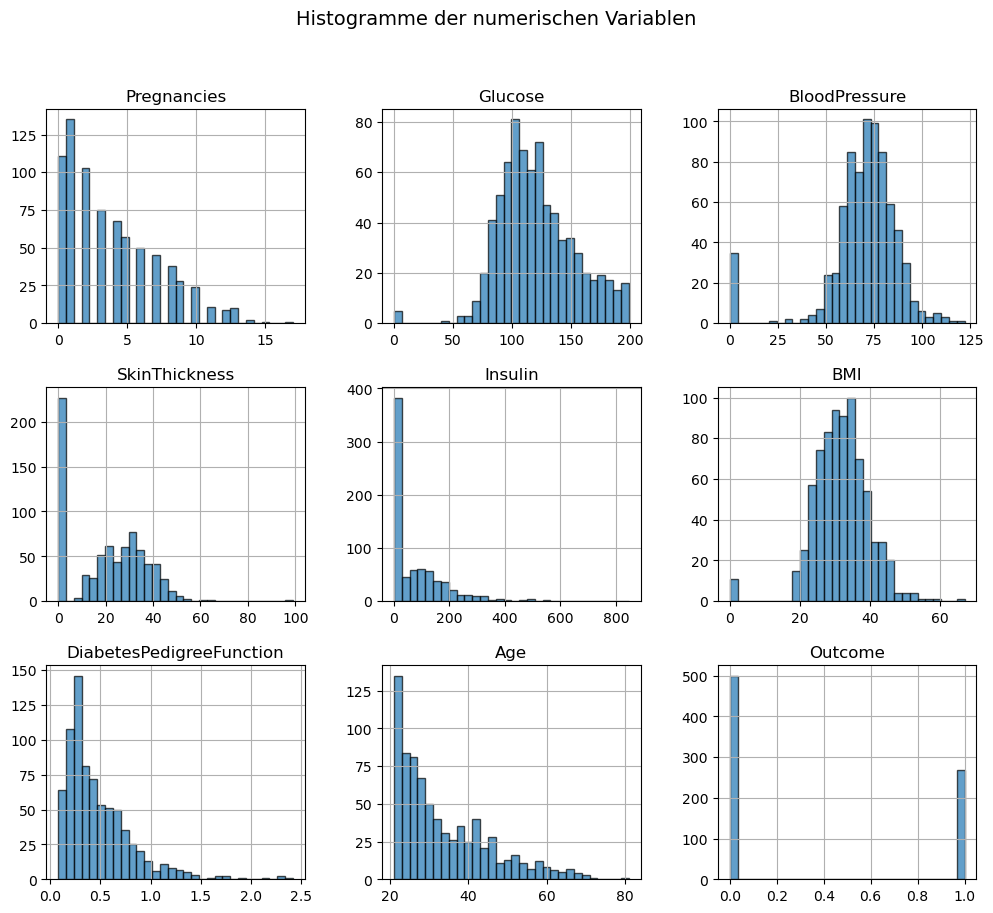

Skewness der Daten:
Rechtssteile (positive Skewness) - Linkssteile (negative Skewness)
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

Anzahl der potenziellen Ausreißer (Werte > 3*std vom Mittelwert):
Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                         14
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Berechnung der Schlüsselstatistiken für numerische Variablen
summary_stats = df.describe().T
summary_stats["median"] = df.median()
summary_stats = summary_stats[["mean", "median", "min", "max", "std"]]

print("Schlüsselstatistiken für numerische Variablen:")
print(summary_stats, "\n")

# Erstelle Histogramme für jede numerische Variable
df.hist(figsize=(12, 10), bins=30, edgecolor='black', alpha=0.7)
plt.suptitle("Histogramme der numerischen Variablen", fontsize=14)
plt.show()

# Identifiziere mögliche ungewöhnliche Werte und Skewness
skewness = df.skew()
print("Skewness der Daten:")
print("Rechtssteile (positive Skewness) - Linkssteile (negative Skewness)")
print(skewness)

# Identifizierung potenzieller Ausreißer basierend auf 3 Standardabweichungen
outliers = df[(np.abs(df - df.mean()) > 3 * df.std())].count()
print("\nAnzahl der potenziellen Ausreißer (Werte > 3*std vom Mittelwert):")
print(outliers)


    3. Outlier:
			- Decide on a formal method to detect univariate outliers.
			- Report the number of outliers per variable.
			- Create scatterplots for each combination of variables.
			- Can you identify possible multivariate outliers that you did not detect as univariate outliers?

Anzahl der univariaten Ausreißer pro Variable (Tukeys Fence):
{'Pregnancies': 4, 'Glucose': 5, 'BloodPressure': 45, 'SkinThickness': 1, 'Insulin': 34, 'BMI': 19, 'DiabetesPedigreeFunction': 29, 'Age': 9, 'Outcome': 0, 'Mahalanobis_Distance': 23} 



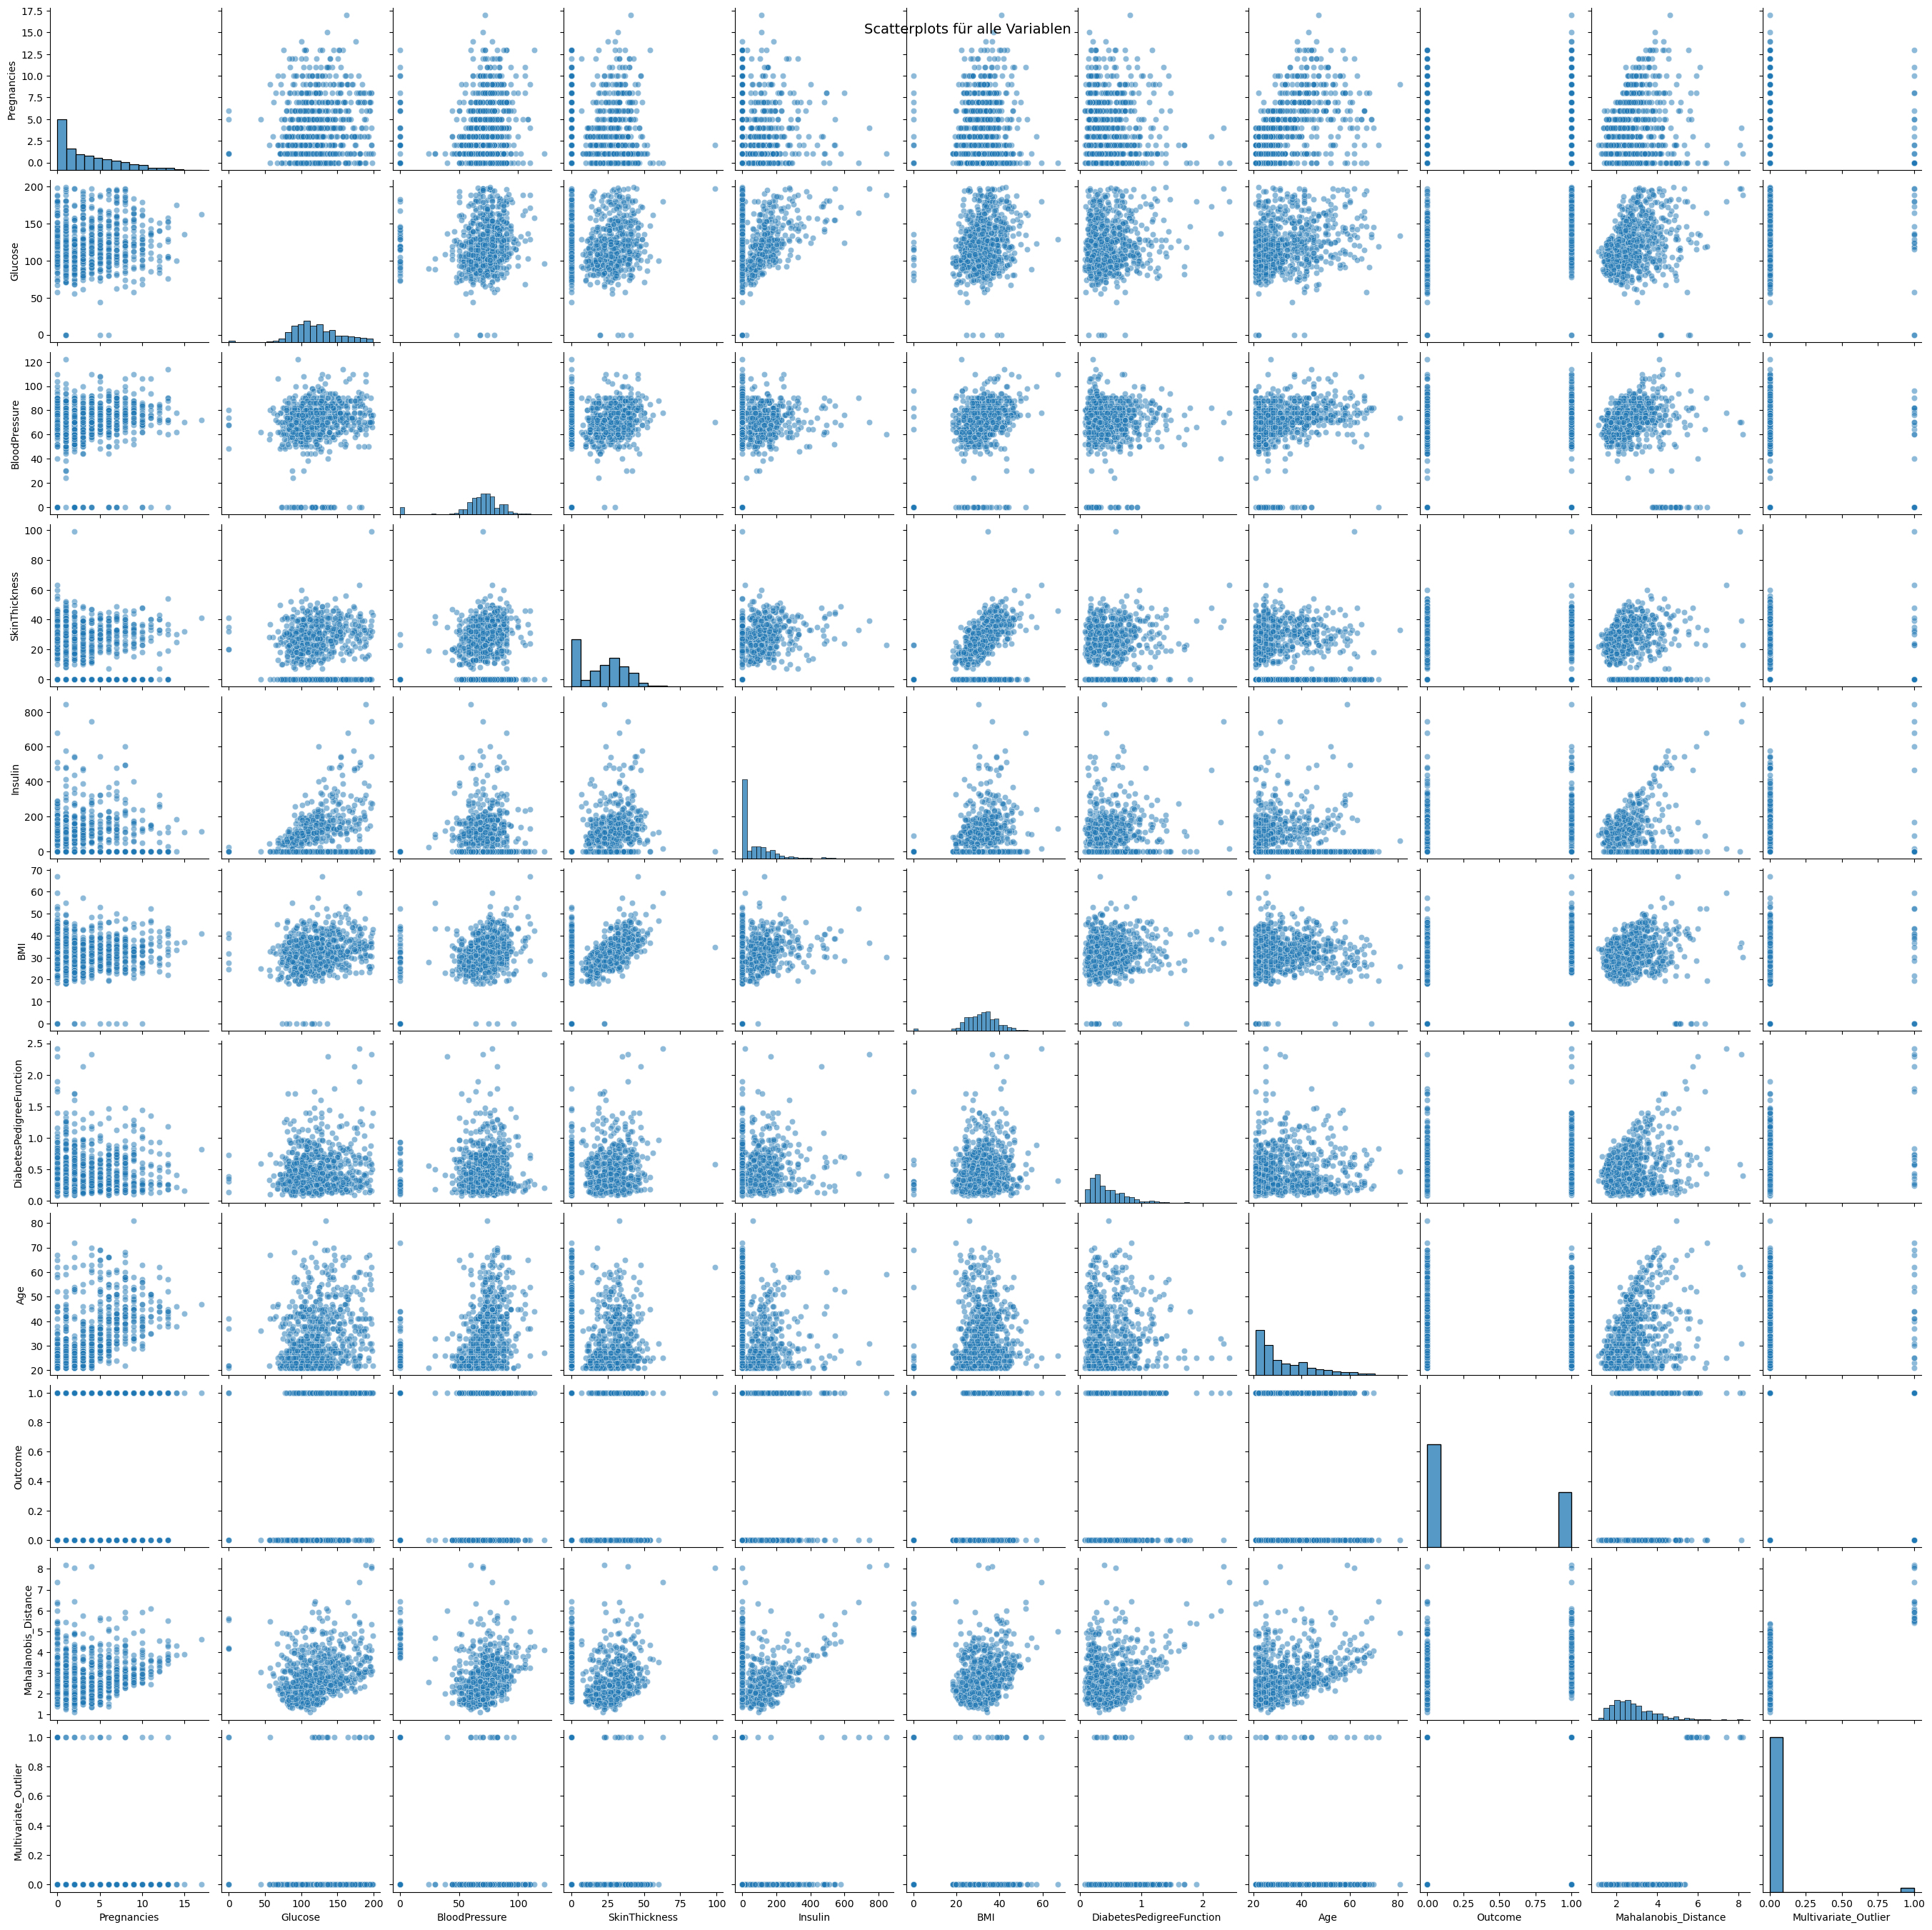


Anzahl der multivariaten Ausreißer: 20


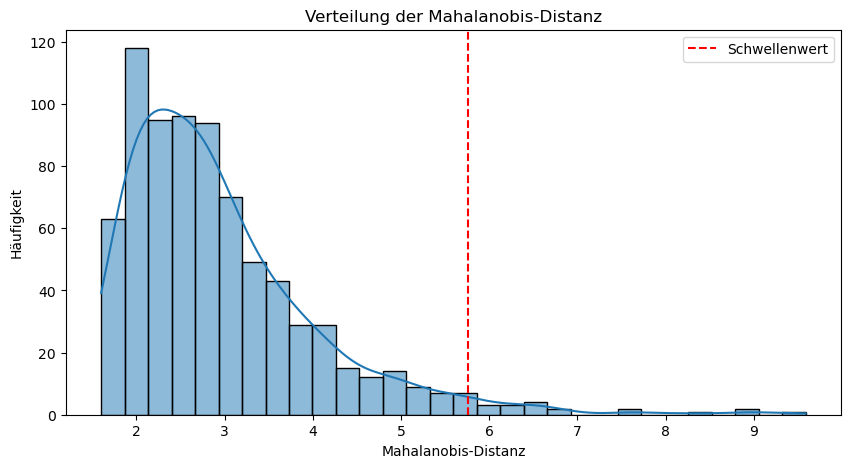

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Methode zur Erkennung von univariaten Ausreißern: Tukey's Fence (IQR-Methode)
outlier_counts = {}
df_outliers = df.copy()

for col in df.select_dtypes(include=["int64", "float64"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    outlier_counts[col] = outlier_mask.sum()
    df_outliers[col + "_outlier"] = outlier_mask

# Anzahl der Ausreißer pro Variable ausgeben
print("Anzahl der univariaten Ausreißer pro Variable (Tukeys Fence):")
print(outlier_counts, "\n")

# Scatterplots für jede Kombination von Variablen
sns.pairplot(df, diag_kind="hist", plot_kws={"alpha": 0.5})
plt.suptitle("Scatterplots für alle Variablen", fontsize=14)
plt.show()

# Multivariate Ausreißer mit Mahalanobis-Distanz erkennen
from scipy.spatial.distance import mahalanobis

def mahalanobis_distance(df, cov_inv):
    mean = df.mean().values
    return df.apply(lambda row: mahalanobis(row, mean, cov_inv), axis=1)

# Berechnung der Mahalanobis-Distanz für numerische Variablen
df_numeric = df.select_dtypes(include=["int64", "float64"])
cov_matrix = np.cov(df_numeric.T)
cov_matrix_inv = np.linalg.inv(cov_matrix)

df["Mahalanobis_Distance"] = mahalanobis_distance(df_numeric, cov_matrix_inv)

# Definiere einen Schwellenwert für multivariate Ausreißer (Chi-Quadrat-Verteilung)
threshold = np.percentile(df["Mahalanobis_Distance"], 97.5)
df["Multivariate_Outlier"] = df["Mahalanobis_Distance"] > threshold

# Anzahl der multivariaten Ausreißer ausgeben
print("\nAnzahl der multivariaten Ausreißer:", df["Multivariate_Outlier"].sum())

# Visualisierung der multivariaten Ausreißer
plt.figure(figsize=(10, 5))
sns.histplot(df["Mahalanobis_Distance"], bins=30, kde=True)
plt.axvline(threshold, color="red", linestyle="dashed", label="Schwellenwert")
plt.title("Verteilung der Mahalanobis-Distanz")
plt.xlabel("Mahalanobis-Distanz")
plt.ylabel("Häufigkeit")
plt.legend()
plt.show()


Die Mahalanobis-Distanz misst, wie weit ein Datenpunkt von der „zentralen Struktur“ eines Datensatzes entfernt ist, unter Berücksichtigung von Korrelationen zwischen Variablen.

- Sie zeigt, wie ungewöhnlich ein Punkt in einem mehrdimensionalen Raum ist.
- Höhere Werte bedeuten, dass der Punkt weiter von der Hauptverteilung entfernt liegt (möglicher Ausreißer).

Schwellenwert 97.5% -> rote Linie
Die oberen 2.5% werden als Ausreißer festgelegt

    3. Outlier:
			- Decide on a formal method to detect univariate outliers.
			- Report the number of outliers per variable.
			- Create scatterplots for each combination of variables.
			- Can you identify possible multivariate outliers that you did not detect as univariate outliers?


    4. Missing Values:,
        - Identify columns with missing values,
        - Discuss possible strategies to handle the missing data.


    5. Correlations.
			- Create a correlation matrix for the dataset.
			- Visualize the correlation matrix.

#### Task B
Based on your Data Audit, prepare your data for further analysis by handling outliers and missing data.


#### Task C
Test different methods to sample training and test data from the dataset. Compare the sampled datasets based on the descriptive methods you have learned and evaluate which sampling method worked best.